# Principal Component Analysis

## 7.1 Classifying Flowers

The Iris Dataset is a well known database in the pattern recognition literature. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.

Four features are given:
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 

We will explore this dataset next.

In [3]:
import numpy as np

In [5]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

list(iris.target_names)

['setosa', 'versicolor', 'virginica']

In [7]:
m, n = X.shape
print("# Samples: ", m)
print("# Features: ", n)

print(X[:10])

print(y[:10])
print(np.unique(y))

# Samples:  150
# Features:  4
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]
[0 1 2]


Then, standardise the data. Instead of doing this explictly ourselves (like in previous cases), let's use a class from the module `sklearn` called `StandardScaler` that is doing exactly the normalization we want: center to zero and divide by standard deviation (so that re-scaled data will have zero mean and unit variance).

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # This creats a new OBJECT that has methods and attributes
scaler.fit(X) # Ask our scaler to process the data and calculate all parameteres necessary for the scaling (the means and variances)
print ("Means: ", scaler.mean_) # We can now see what are the parameter values our scaler has calculated, means_ stores the mean values for each feature
print ("Variances: ", scaler.var_) # var_ stores the variances for each feature

Xcentred = scaler.transform(X) # Now ask our scaler to scale the data we pass it using the parameters it has calculated
print ("Some of our data :\n", Xcentred[:5])

# We can also do the fit and the transform of our data in a single call
Xcentred = scaler.fit_transform(X)
print ("See that the result is the same if we do everything in a single go :\n", Xcentred[:5])


Means:  [5.84333333 3.05733333 3.758      1.19933333]
Variances:  [0.68112222 0.18871289 3.09550267 0.57713289]
Some of our data :
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]
See that the result is the same if we do everything in a single go :
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


### PCA Calculation

Let's apply PCA manually, using numpy.

In [13]:
# Calculate the covariance matrix
Sigma = (1/m-1) * Xcentred.T @ Xcentred 
#  4x4                 4x150       150x4

# Compute the eigenvalues and right eigenvectors of a square array
[val, vec] = np.linalg.eig(Sigma)

# Project into the new space
vecReduced = vec[:, :3] # Pick only the first few eigen vectors
Xnew = Xcentred @ vecReduced # Our samples are row vectors, and the eigenvectors are column vectors

print("Original size of our dataset: ", Xcentred.shape)
print("New size of our dataset: ", Xnew.shape)

print(vec)
print(vecReduced)
print(val)

Original size of our dataset:  (150, 4)
New size of our dataset:  (150, 3)
[[-0.52106591  0.37741762 -0.71956635  0.26128628]
 [ 0.26934744  0.92329566  0.24438178 -0.12350962]
 [-0.5804131   0.02449161  0.14212637 -0.80144925]
 [-0.56485654  0.06694199  0.63427274  0.52359713]]
[[-0.52106591  0.37741762 -0.71956635]
 [ 0.26934744  0.92329566  0.24438178]
 [-0.5804131   0.02449161  0.14212637]
 [-0.56485654  0.06694199  0.63427274]]
[-434.85617466 -136.19054025  -21.86677446   -3.08651063]


In [15]:
# Note that the Eigenvectors returned are unit vectors (length = 1). We will calculate the length of one of them
print ("Length of one of the eigenvectors: ", np.sqrt(vec[:, 2].T@vec[:, 2]))

# Let's also see how much variance does the principal component 1 explain
varExplained = val[0] / sum(val)

print("The first principal component explains {0} of variance".format('%.7f' % varExplained))

Length of one of the eigenvectors:  0.9999999999999999
The first principal component explains 0.7296245 of variance


How much variance is explained by the first three principal components? 

In [18]:
print("variance explained by the three principal components: {}".format(sum(val[:3]) / sum(val)) )

# Let's also see how much variance does the principal component 1 explain
varExplained = val[0] / sum(val)
print("The first principal component explains {0} of variance".format('%.7f' % varExplained))

# Let's also see how much variance does the principal component 2 explain
varExplained = val[1] / sum(val)
print("The second principal component explains {0} of variance".format('%.7f' % varExplained))

# Let's also see how much variance does the principal component 3 explain
varExplained = val[2] / sum(val)
print("The third principal component explains {0} of variance".format('%.7f' % varExplained))

variance explained by the three principal components: 0.9948212908928453
The first principal component explains 0.7296245 of variance
The second principal component explains 0.2285076 of variance
The third principal component explains 0.0366892 of variance


### Calculating PCA using sklearn

The sklearn module provides us with a ready made function for applying PCA on our data. Here is how we can use this functionality.

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

pca.fit(Xcentred)

print("These are the calculated components: \n", pca.components_) # The PCA object now contains useful information in its attributes. components_ stores the principal components calculated
print("The components we have found, explain the following percentage of variance: \n", pca.explained_variance_ratio_) # explained_variance_ratio_ stores the percentage of variance each of our components explains

# Now apply the PCA transform on the original data
Xnew2 = pca.transform(Xcentred)

print("Original size of our dataset: ", Xcentred.shape)
print("Reduced size of our dataset: ", Xnew2.shape)

These are the calculated components: 
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]]
The components we have found, explain the following percentage of variance: 
 [0.72962445 0.22850762 0.03668922]
Original size of our dataset:  (150, 4)
Reduced size of our dataset:  (150, 3)


Let's double check that we get the same results with all methods

In [25]:
print ("Some of our new samples (sklearn): \n", Xnew2[:5])

# We can calculate and apply PCA in a single step as well (like we did previously with the scaler)
Xnew3 = pca.fit_transform(Xcentred)
print ("See that we obtain the same results (sklearn one-line): \n", Xnew3[:5])

# Let's also double check that this way we obtain the same output as what we got before, when we applied SVD ourselves
print ("And this is what we got before ourselves (numpy): \n", Xnew[:5])

Some of our new samples (sklearn): 
 [[-2.26470281  0.4800266   0.12770602]
 [-2.08096115 -0.67413356  0.23460885]
 [-2.36422905 -0.34190802 -0.04420148]
 [-2.29938422 -0.59739451 -0.09129011]
 [-2.38984217  0.64683538 -0.0157382 ]]
See that we obtain the same results (sklearn one-line): 
 [[-2.26470281  0.4800266   0.12770602]
 [-2.08096115 -0.67413356  0.23460885]
 [-2.36422905 -0.34190802 -0.04420148]
 [-2.29938422 -0.59739451 -0.09129011]
 [-2.38984217  0.64683538 -0.0157382 ]]
And this is what we got before ourselves (numpy): 
 [[ 2.26470281  0.4800266  -0.12770602]
 [ 2.08096115 -0.67413356 -0.23460885]
 [ 2.36422905 -0.34190802  0.04420148]
 [ 2.29938422 -0.59739451  0.09129011]
 [ 2.38984217  0.64683538  0.0157382 ]]


Differences between the results: 

---

*The results are actually the same. The fact that some columns might be inverted (multiplied by -1) is not important - it only reflects the fact that there are two ways to define the directions of the eigenvectors*

---

### Plotting the results

</br>

Now `Xnew` contains 3 features, so we can do a 3D plot.

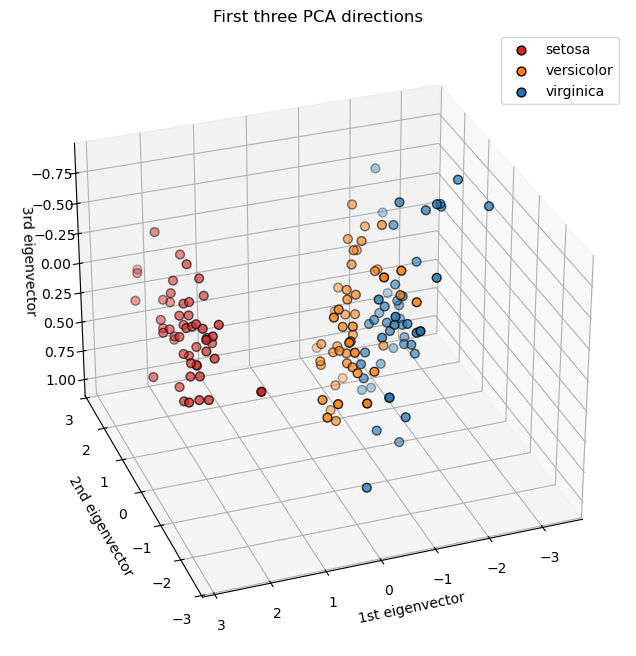

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Necessary to do 3D plots

def plot3DScatter(X, y):
    # To getter a better understanding of interaction of the dimensions
    # plot the first three PCA dimensions    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
    

    # Plot the training points
    for c, name, col in zip(set(y), iris.target_names, ["tab:red", "tab:orange", "tab:blue"]):
        ax.scatter(X[y==c, 0], X[y==c, 1], X[y==c, 2], 
                   color = col, edgecolor='k', 
                   label = name, s=40)
        
    ax.set_title("First three PCA directions")
    ax.set_xlabel("1st eigenvector")
    ax.set_ylabel("2nd eigenvector")
    ax.set_zlabel("3rd eigenvector")
    ax.legend()    
    plt.show()
    
plot3DScatter(Xnew, y)

Now we reduce our data to two dimensions, and create a 2D scatter plot to display the results.

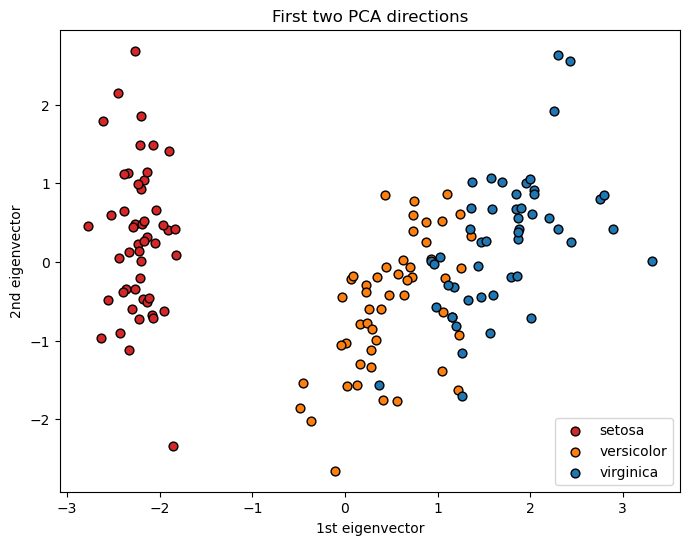

In [35]:
pca = PCA(n_components=2) # Like we did before with the scaler, we define here a PCA OBJECT and initialise it with the number of PCA components we want to use
Xnew = pca.fit_transform(Xcentred)

def plot2DScatter(X, y):
    # Plot the training points
    fig, ax = plt.subplots(figsize=(8, 6))
    
    for c, name, col in zip(set(y), iris.target_names, ["tab:red", "tab:orange", "tab:blue"]):
        ax.scatter(X[y==c, 0], X[y==c, 1], color = col, edgecolor='k', label = name, s=40)

    ax.set_title("First two PCA directions")
    ax.set_xlabel("1st eigenvector")
    ax.set_ylabel("2nd eigenvector")
    ax.legend()    
    plt.show()
    
plot2DScatter(Xnew, y)

## Room Temperature

We have installed 4 temperature probes in a room that sample and record the temperature every 30 minutes. The file attached is an example of what the four measurements might look like over a few days. Let's read the data in.

In [38]:
import pandas as pd

data = pd.read_csv("room-temperature.csv", parse_dates=['Date'])
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        144 non-null    datetime64[ns]
 1   FrontLeft   144 non-null    float64       
 2   FrontRight  144 non-null    float64       
 3   BackLeft    144 non-null    float64       
 4   BackRight   144 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 5.8 KB


,Date,FrontLeft,FrontRight,BackLeft,BackRight
0,2010-04-11 11:30:00,295.2,297.0,295.8,296.3
1,2010-04-11 12:00:00,296.2,296.4,296.2,296.3
2,2010-04-11 12:30:00,297.3,297.5,296.7,297.1
3,2010-04-11 13:00:00,295.9,296.7,297.4,297.0
4,2010-04-11 13:30:00,297.2,296.5,297.6,297.4


Let's visualise the data. We will do a plot with 4 subplots.

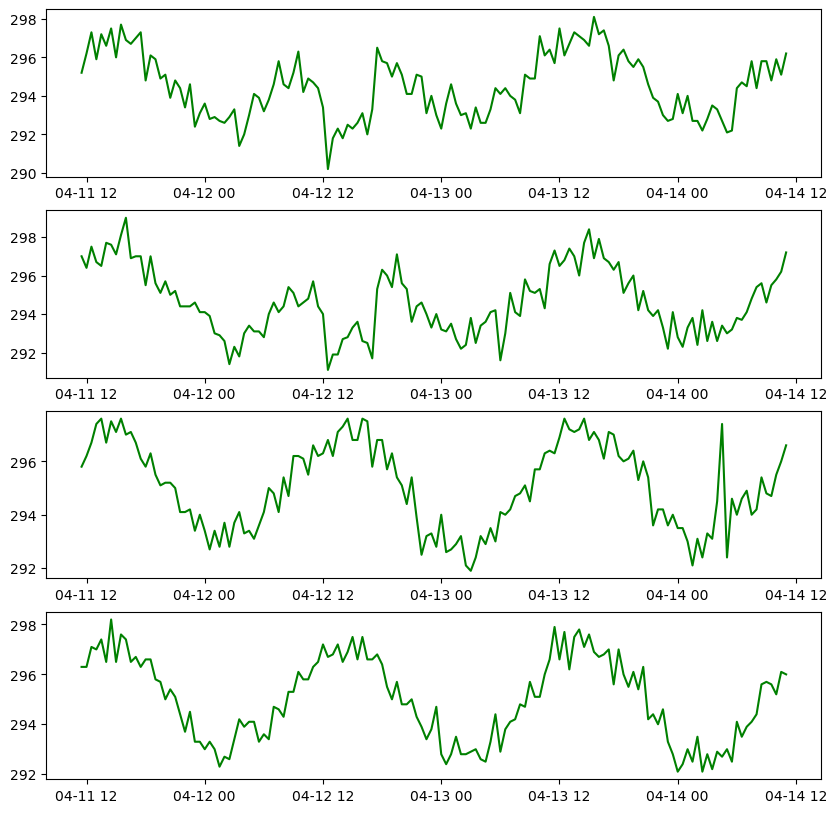

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10) )

ax=plt.subplot(4, 1, 1)
ax.plot(data['Date'], data['FrontLeft'], 'g')

ax=plt.subplot(4, 1, 2)
ax.plot(data['Date'], data['FrontRight'], 'g')

ax=plt.subplot(4, 1, 3)
ax.plot(data['Date'], data['BackLeft'], 'g')

ax=plt.subplot(4, 1, 4)
ax.plot(data['Date'], data['BackRight'], 'g')

<font color=blue> How many latent features do you think we need to describe the data? </font>

---

*It seems like all features are very correlated, apart from a small range of time where the two front sensors show a lower temperature (maybe a door was oppened). Even if we take this into account, we observe that the two front sensors are very correlated and the two back sensors are similarly very correlated. So we expect that with a single dimension (a species of "room temperature" feature) or at most with two dimensions (a species of back and front room temperature) we should be able to explain most of our data.*

---


We have four different features (measurements from four thermometers) in our data. It would be nice to visualise the data, but we cannot do so for 4D data. One way to visualise these data and see if different features are correlated with each other, is to do scatter plots between all possible pairs of features. This is called a **"scatter plot matrix"**.

We will define a function to produce such a scatter plot matrix (do not worry about understanding the details).

In [48]:
import itertools

def scatterplot_matrix(data, names, **kwargs):
    numdata, numvars = data.shape
    fig, axes = plt.subplots(nrows=numvars, ncols=numvars, figsize=(8,8))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)

    for ax in axes.flat:
        # Hide all ticks and labels
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

        # Set up ticks only on one side for the "edge" subplots...
        if ax.get_subplotspec().is_first_col():
            ax.yaxis.set_ticks_position('left')
        if ax.get_subplotspec().is_last_col():
            ax.yaxis.set_ticks_position('right')
        if ax.get_subplotspec().is_first_row():
            ax.xaxis.set_ticks_position('top')
        if ax.get_subplotspec().is_last_row():
            ax.xaxis.set_ticks_position('bottom')

    # Plot the data.
    for i, j in zip(*np.triu_indices_from(axes, k=1)):
        for x, y in [(i,j), (j,i)]:
            axes[x,y].plot(data[:,x], data[:,y], **kwargs)

    # Label the diagonal subplots...
    for i, label in enumerate(names):
        axes[i,i].annotate(label, (0.5, 0.5), xycoords='axes fraction',
                ha='center', va='center')

    # Turn on the proper x or y axes ticks.
    for i, j in zip(range(numvars), itertools.cycle((-1, 0))):
        axes[j,i].xaxis.set_visible(True)
        axes[i,j].yaxis.set_visible(True)

    return fig

Now we will use the function above to do a scatter plot matrix of our own data

First, get a numpy array with the data columns of interest (expluding the date). Then use the scatter plot matrix function to visualise the data.

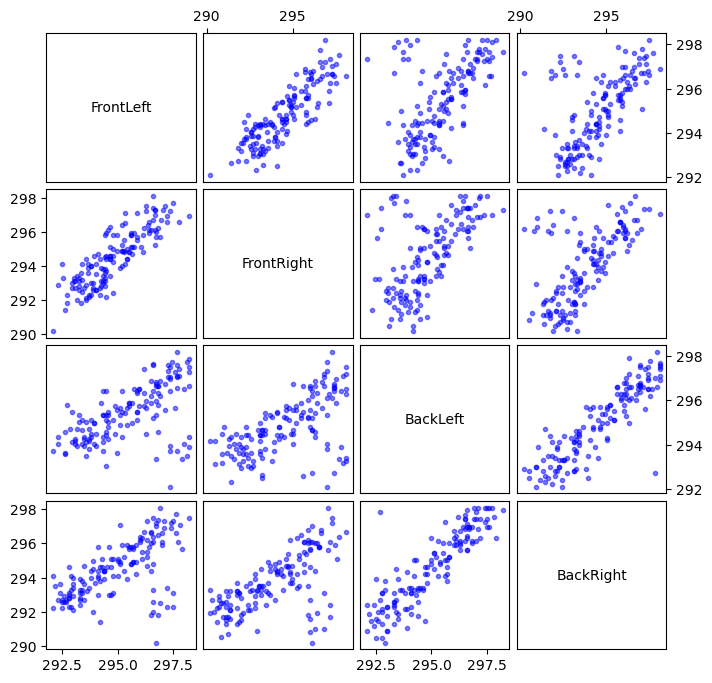

In [52]:
temp_samples = data[ ['FrontLeft', 'FrontRight', 'BackLeft', 'BackRight']].to_numpy()

fig = scatterplot_matrix(temp_samples, ['FrontLeft', 'FrontRight', 'BackLeft', 'BackRight'], \
                   linestyle='none', marker='.', color='blue', alpha = 0.5)

plt.show()

<font color=blue>Standardise the data to zero mean and unit variance, using `StandardScaler` from the module `sklearn`</font>

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
temp_scaledSamples = scaler.fit_transform(temp_samples)

<font color=blue>Now build a PCA model using any method you like (e.g. directly calculating eigenvectors, or using the `pca` class of `sklearn`) and reduce the dimensionality to 2. Plot your reduced dimensionality data.</font>

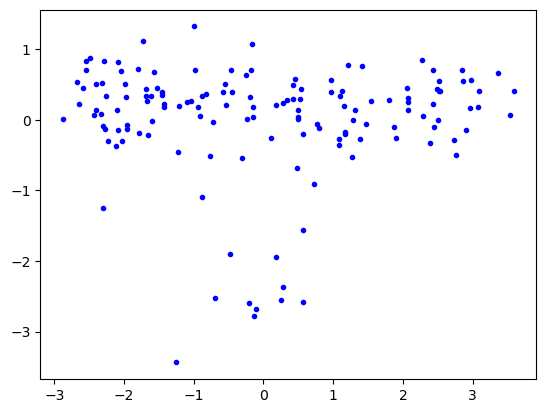

In [57]:
# Calculate covariance matrix
m, n = temp_scaledSamples.shape

S = temp_scaledSamples.T @ temp_scaledSamples 
S = S / (1-m)

[val, vec] = np.linalg.eig(S)

# Project into the new space
vecReduced = vec[:, :2] # Pick only the first few eigen vectors
temp_new = temp_scaledSamples @ vecReduced # Our samples are row vectors, and the eigenvectors are column vectors

plt.scatter(temp_new[:,0], temp_new[:,1], marker='.', c='blue')

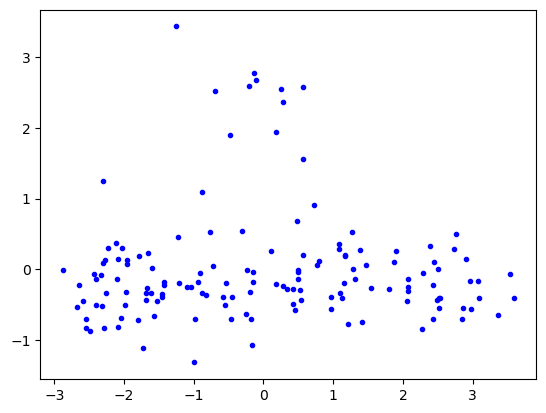

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
temp_newSamples = pca.fit_transform(temp_scaledSamples)

plt.scatter(temp_newSamples[:,0], temp_newSamples[:,1], marker='.', c='blue')

<font color=blue>How much variance is explained by your two principal components?</font>

In [61]:
print("Explained variance: ", sum(val[:2]) / sum(val))

# USING sklearn
print("Explained variance: ", sum(pca.explained_variance_ratio_))

Explained variance:  0.9350472363222373
Explained variance:  0.9350472363222373
